In [1]:
import json 
from collections import defaultdict
import os 
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib as mpl



In [2]:
day_menu = defaultdict(list)

PATH = "../test_result"
files = os.listdir("../test_result")
for file in files : 
    with open(PATH+f"/{file}", "r") as f:
        data = json.load(f)
        for k,v in data.items():
            if k == "월요일" or k == "화요일" or k == "수요일" or k == "목요일" or k == "금요일":
                day_menu[k].append(v)





In [21]:
refine_day_menu = defaultdict(list)


for day, menus in day_menu.items():
    for menu in menus:
        menu = menu.split("\n")
        if len(menu) == 15:
            refine_day_menu[day].extend(menu[1:])

In [22]:
for k , v in refine_day_menu.items():
    print(f"{k} : {len(v)}")

월요일 : 238
화요일 : 266
수요일 : 224
목요일 : 252
금요일 : 252


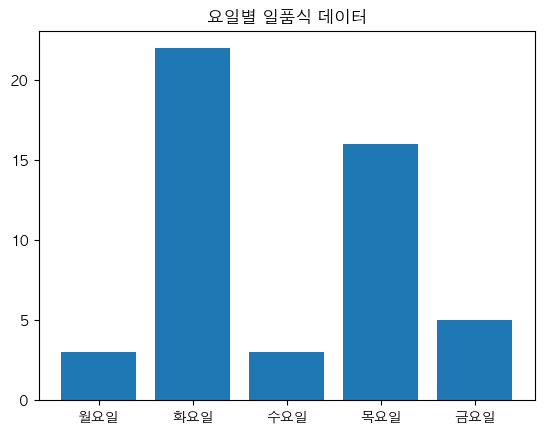

In [23]:
# 언제 일품식이 가장 많이 나왔나
illpum = dict()

for k,v in refine_day_menu.items():
    for menu in v:
        if "[일품식]" in menu:
            illpum[k] = illpum.get(k, 0) + 1

# # 한글 폰트 설정
mpl.rcParams['font.family'] = 'AppleGothic'  # macOS

# 폰트 사이즈 설정
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

plt.bar(illpum.keys(), illpum.values())
plt.title('요일별 일품식 데이터')
plt.show()

# 화요일이랑 목요일에 일품식이 많이 나오는구나! 

In [24]:
all_menu = [] 
for mon , menus in refine_day_menu.items():
    for menu in menus:
        all_menu.append(menu)

In [25]:
print(len(all_menu))

1232


In [26]:
weight = Counter(all_menu)

In [27]:
weight.most_common(10)

[('포기김치', 139),
 ('쌀밥', 89),
 ('그린샐러드&드레싱', 85),
 ('[일품식]', 49),
 ('콩나물무침', 16),
 ('단무지', 15),
 ('추가밥', 14),
 ('매실차', 12),
 ('수정과', 12),
 ('배추겉절이', 10)]